# Is there a salary difference between player position? 

## Import the required packages, data, and clean the data

In [27]:
exec(open("../Scripts/Packages.py").read())
exec(open("../Scripts/Data_Import.py").read())
exec(open("../Scripts/Data_Cleaning.py").read())

Data organization for this research question

In [28]:
Position_Analysis = Salary_Analysis.loc[:, ['salary', 'G_p','G_c','G_1b','G_2b','G_3b','G_ss','G_lf','G_cf','G_rf', 'G_dh'] ]

# Function which tells the dataframe if the value is 0, then they never played that position
def Binary(s):
    if s == 0:
        return 0
    else: 
        return 1
    
# Apply to the whole dataframe
Binary_Position = Position_Analysis.applymap(Binary)  

#Bring back in the correct salary values
Binary_Position['salary'] = Position_Analysis['salary']/1000000

#Melt to make long form data
Binary_List = pd.melt(Binary_Position, id_vars=['salary'], value_vars=['G_p','G_c','G_1b','G_2b','G_3b','G_ss','G_lf','G_cf','G_rf', 'G_dh'], var_name='Position', value_name='Count')

#Elimiate the positions not played
Player_Position = Binary_List.loc[Binary_List['Count'] == 1]

#Cleanup
Player_Position = Player_Position.drop(['Count'], axis=1)

#Pivot for Analysis
Pivot = Player_Position.pivot(columns='Position', values='salary')

## Manually examine the differences in the group

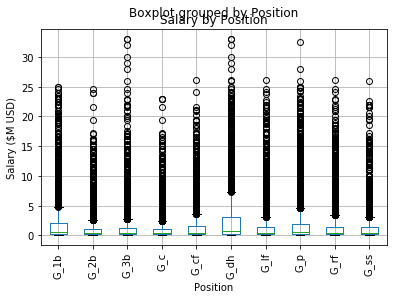

In [29]:
Player_Position.boxplot(by = 'Position', rot=90)
plt.title('Salary by Position')
plt.xlabel('Position')
plt.ylabel('Salary ($M USD)')
plt.show()

## Use statistical testing to confirm the variance

Set the significance value before any testing. 

In [30]:
alpha_value = 0.001
independent = True

Combined Statistical Testing Workflow

In [31]:
exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

Comparing Standard Deviations

T-statistic: 31258.3461113
P-Value: 0.0
  
Reject NULL hypothesis - Significant differences exist between the standard deviations of the groups.


Checking for Normality

P-value: 2.0491561898e-17
  
Reject NULL hypothesis - Not normal distribution


ANOVA Testing

Can one use ANOVA?
  
Independent:  True
Normal:  False
StdDevEq:  False
  
The assumptions to use ANOVA have not been met.

Kruskal-Wallis Testing

H-statistic: 648.330310994
P-Value: 8.78212303598e-134

Reject NULL hypothesis - Significant differences exist between groups.
